**მონაცემთა ანალიზი პითონის გამოყენებით**
<br>
Date: **2020 წლის 6 ივნისი**
<br>

სათაური: **ლექცია №2: SciPy: სამეცნიერო ინსტრუმენტები**
<br>
მომხსენებელი: **შოთა ცისკარიძე**

<h1 align="center">SciPy: სამეცნიერო ინსტრუმენტები</h1>

<h3 align="center">რა არის SciPy?</h3>

- **SciPy** არის მათემატიკური ალგორითმების და დამხმარე ფუნქციების ნაკრები, რომელიც აგებულია **NumPy** მონაცემთა სტრუქტურებზე: 

  http://www.scipy.org/


- **SciPy** საშუალებით შესაძლებელია მონაცემთა დამუშავება და პროტოტიპური გარემოს შექმნა, რომელიც კონკურენციას უწევს **MATLAB**-ს;


- **SciPy** ორგანიზებულია ქვეპაკეტებში (**Submodules**), რომლებიც მოიცავს სხვადასხვა დარგის სამეცნიერო გამოთვლებს. 
<br> მოდულების სრული დოკუმენტაციაში შეგიძლიათ იხილოთ აქ: 

  http://docs.scipy.org/doc/scipy/reference/


- **SciPy**-ის ყველაზე ცნობილი მოდულებია:
  - **სპეციალური ფუნქციები (scipy.special)**
  - **წრფივი ალგებრა (scipy.linalg)**
  - **ოპტიმიზაცია (scipy.optimize)**
  - **ინტერპოლაცია (scipy.interpolate)**
  - **ინტეგრირება (scipy.integrate)**
  - ფურიეს ტრანსფორმაციები (scipy.fftpack)
  - სიგნალის დამუშავება (scipy.signal)
  - **სტატისტიკა (scipy.stats)**
  - სურათის მრავალგანზომილებიანი დამუშავება (scipy.ndimage)
  - File IO (scipy.io)  
  - Და მეტი...


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<h3 align="center">$\texttt{scipy.special}$ - სპეციალური ფუნქციები</h3>

- $\texttt{scipy.special}$ მოდულის მთავარი მახასიათებელია მათემატიკური ფიზიკის მრავალი განსაკუთრებული ფუნქციის განსაზღვრა.


- განვიხილოთ, მაგალითად, **ბესელის ფუნქციები**, რომლებიც წარმოადგენენ ბესელის დიფერენციალურ განტოლების ამოხსნების ოჯახს რეალურ ან კომპლექსურ $\alpha$ მნიშვნელობებისთვის: 

$$x^2 \frac{d^2y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2) y = 0$$

- $\texttt{scipy.special}$-ი იძლევა ბასელის ფუნქციების პირდაპირ შემოღების საშუალებას.

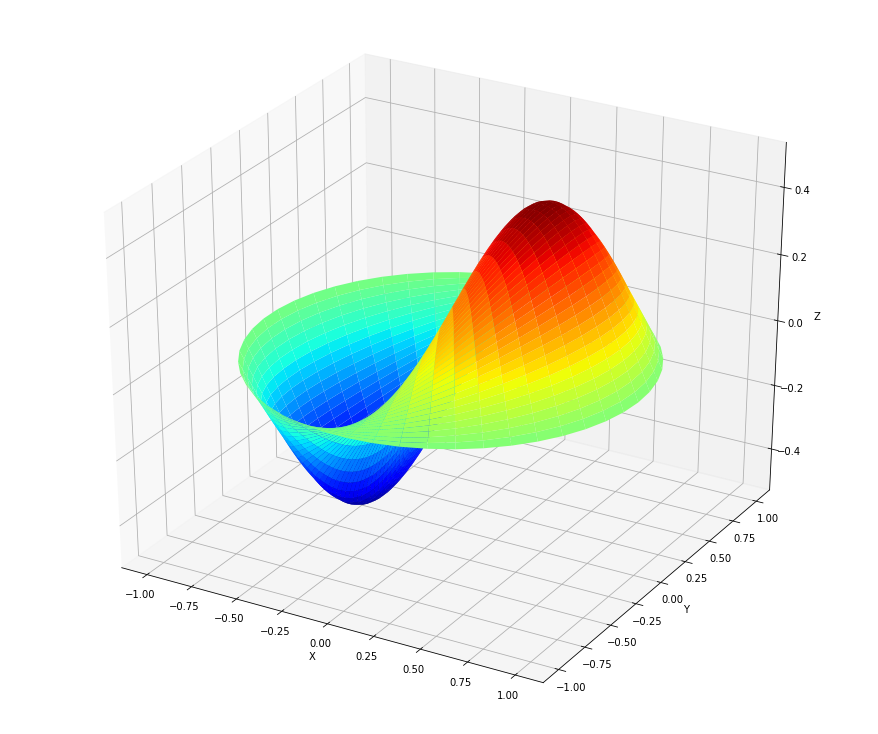

In [2]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta  = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

from mpl_toolkits.mplot3d import Axes3D #იძლევა ბაზური 3D გრაფიკების აგების საშუალებას
from matplotlib import cm
fig = plt.figure(figsize=(12, 10))
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<h3 align="center">$\texttt{scipy.linalg}$ - წრფივი ალგებრის მოდული</h3>

- $\texttt{scipy.linalg}$ მოდული $\texttt{numpy.linalg}$ მოდულის ყველა ფუნქციას შეიცავს;


- $\texttt{scipy.linalg}$ მოდულის ფუნქციები შეიძლება უფრო სწრაფად მუშაობდეს, ვიდრე $\texttt{numpy.linalg}$, რადგან ისინი ყოველთვის იყენებენ წრფივი ალგებრის ძალიან ეფექტურ $\texttt{BLAS/LAPACK}$ ბიბლიოთეკას.


<h3 align="center">მატრიცა</h3>

- სკალარების სიმრავლეს $\alpha_{ij}$ ($i,j = 1, ..., n$), რომელიც არის ინდექსირებული ორმაგი ინდექსით $i$, $j$, ეწოდება მატრიცა და აღინიშნება როგორც $[A]$:

  მატრიცა ჩვეულებრივ იწერება როგორც კვადრატული მასივი:

  $$[A] = \begin{bmatrix}
\alpha_{11} & \alpha_{12} & \cdots  & \alpha_{1n} \\ 
\alpha_{21} & \alpha_{11} & \cdots  & \alpha_{2n} \\ 
\vdots & \vdots & \ddots  & \vdots \\ 
\alpha_{n1} & \alpha_{11} & \cdots  & \alpha_{nn} 
\end{bmatrix};$$

  სკალარები $(\alpha_{i1}, ... , \alpha_{in})$ ქმნიან მატრიცის სტრიქონებს, 
  <br> ხოლო სკალარები $(\alpha_{1j}, ... , \alpha_{nj})$ ქმნიან მატრიცის სვეტებს.
  

- Python-ში არსებობს მატრიცის შემოღების ორი მეთოდი $\texttt{numpy.array}$ და $\texttt{numpy.mat}$.

- $\texttt{numpy.array}$-სთვის მატრიცების გამრავლების ოპერაცია ხორციელდება ელემენტრულად:

In [3]:
A = np.array([ [1, 2], [3, 4] ])
B = np.array([ [1, 2], [3, 4] ])
print(A*B)

[[ 1  4]
 [ 9 16]]


- $\texttt{numpy.mat}$-სთვის მატრიცების გამრავლების ოპერაცია ხორციელდება მატრიცების ალგებრის წესების შესაბამისად:

In [4]:
A = np.mat([ [1, 2], [3, 4] ])
B = np.mat([ [1, 2], [3, 4] ])
print(A*B)

[[ 7 10]
 [15 22]]


<h3 align="center">მატრიცების გადამრავლება</h3>

<img src="images/Matrix_multiplication.png" width="1000" height="1000" alt="Example"  align="center"/>

- გახსოვდეთ, რომ ორი მატრიქსის ზომები უნდა იყოს თავსებადი:



In [5]:
A = np.mat([ [1, 2], [3, 4] ])
b = np.mat([ [1, 2] ])
A*b

ValueError: shapes (2,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

- თქვენ ასევე შეგიძლიათ მატრიცა გაამრავლოთ ვექტორზე:

In [6]:
A = np.mat([ [1, 2], [3, 4] ])
b = np.mat([ [1, 2] ])

print(A*b.T)
#ან
A = np.mat([ [1, 2], [3, 4] ])
b = np.mat([ [   1], [   2] ])
print(A*b)

[[ 5]
 [11]]
[[ 5]
 [11]]


<h3 align="center">მატრიცის დეტერმინანტი</h3>

- $2 \times 2$ მატრიცის დეტერმინანტი გამოითვლება **ლეიბნიცის** ფორმულით:
$$|A| = \begin{vmatrix}
a & b\\ 
c & d
\end{vmatrix}
= ad - bc.
$$

- $3 \times 3$ მატრიცის დეტერმინანტი გამოითვლება **ლაპლასის** ფორმულით:

$$|A| =
\begin{vmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{vmatrix}
=
a \cdot
\begin{vmatrix}
e & f \\
h & i
\end{vmatrix}
- b \cdot
\begin{vmatrix}
d & f \\
g & i
\end{vmatrix}
+ c \cdot
\begin{vmatrix}
d & e \\
g & h
\end{vmatrix}
= aei + bfg + cdh - ceg - bdi - afh.
$$

- $n \times n$ მატრიცის დეტერმინანტი გამოითვლება **ლეიბნიცის** ფორმულით:

  $$|A| = \sum_{\sigma \in S_n} \left ( sign(\sigma)\prod_{i=1}^{n} \alpha_{i\sigma_i} \right ),$$

  სადაც $\sigma$ არის $S_n= \{1, 2, ..., n\}$ სიმრავლის ყველანაირი გადანაცლება.
  
  <img src="images/determinant_as_scaling_factor.gif" width="700" height="1000" alt="Example"  align="center"/>

In [42]:
#მატრიცის დეტერმინანტის გამოთვლა
A = np.random.randn(1000, 1000)

%time detA = np.linalg.det(A)
%time detA = sp.linalg.det(A)

Wall time: 71 ms
Wall time: 56 ms


D:\Work\MaxinAI\Anaconda\lib\site-packages\numpy\linalg\linalg.py:2093: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


<h3 align="center">მატრიცის შებრუნებული</h3>

- $B$ მატრიცას ეწოდება $A$ მატრიცის შებრუნებული, და აღინიშნება როგორც $B = A^{-1}$, თუ:

  $$A^{-1} A = A A^{-1} = I$$


In [43]:
#მატრიცის შებრუნებულის პოვნა
A = np.random.randn(1000, 1000)

%time invA = np.linalg.inv(A)
%time inva = sp.linalg.inv(A)

Wall time: 263 ms
Wall time: 167 ms


<h3 align="center">მატრიცის საკუთრივი მნიშნველობები და საკუთრივი ვექტორები</h3>

- საკუთრივი ვექტორი არის ვექტორი, რომლეიც $A$ მატრიცაზე გამრავლებისას იძლევა კოლინარულ ვექტორს, ანუ იგივე ვექტორი გამრავლებული $\lambda$ სკალარზე, რომელსაც, თავისმხრივ, ეწოდება $A$ მატრიცის საკუთრივი მნიშვნელობა:

  $$A \cdot x = \lambda x$$
  
    <img src="images/eigenvalues_and_vectors.gif" width="700" height="1000" alt="Example"  align="center"/>


In [9]:
A = np.array([ [1, 2], [3, 4] ])
lamb, v = np.linalg.eig(A)
print(lamb, '\n')
print(v[0])
print(v[1])

[-0.37228132  5.37228132] 

[-0.82456484 -0.41597356]
[ 0.56576746 -0.90937671]


In [10]:
A = np.random.randn(1000, 1000)

%time lamb, v = np.linalg.eig(A)
%time lamb, v = sp.linalg.eig(A)

Wall time: 1.95 s
Wall time: 2.08 s


<h3 align="center">წრფივ განტოლებათა სისტემის ამოხსნა</h3>

- წრფივი $n$-უცნობიანი $m$-განტოლებათა სისტემის ზოგადად ფორმაა:

  $$\begin{matrix}
\alpha_{11} x_1 + \alpha_{12} x_2 + \cdots + \alpha_{1n} x_n = b_1\\ 
\alpha_{21} x_1 + \alpha_{22} x_2 + \cdots + \alpha_{2n} x_n = b_2\\  
\vdots \\
\alpha_{m1} x_1 + \alpha_{12} x_2 + \cdots + \alpha_{mn} x_n = b_m
\end{matrix}$$

  სადაც $x_1, ..., x_n$ არის უნცობ ცვალდებს, $\alpha_{11}, ..., \alpha_{mn}$ წარმოადგენენ სისტემის კოეფიციენტებს, ხოლო $b_1, ..., b_m$ აროს მუდმივი წევრები.


- წრფივ განტოლებათა სისტემა შეიძლება ჩაიწეროს ეკვივალენტურ მატრიცულ ფორმით:

  $$Ax = b,$$
  $$\text{სადაც } A = 
\begin{bmatrix}
\alpha_{11} & \alpha_{12} & \cdots  & \alpha_{1n} \\ 
\alpha_{21} & \alpha_{11} & \cdots  & \alpha_{2n} \\ 
\vdots & \vdots & \ddots  & \vdots \\ 
\alpha_{n1} & \alpha_{11} & \cdots  & \alpha_{nn} 
\end{bmatrix}
\text{, }
x = 
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n \\
\end{bmatrix}
\text{ და }
b = 
\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m \\
\end{bmatrix}
$$

- თუ $A^{-1}$ არის $A$ მატრიცის შებრუნებული მატრიცა, მაშინ:

  $$x = I \cdot x = (A^{-1} A) \cdot x = A^{-1} \cdot (A x) = A^{-1} b.$$
  
  ანუ წრფივ განტოლებათა სისტემის ამოხსნა დადის $A$ მატრიცის შებრუნებულის პოვნაზე.

<h3 align="center">მაგალითი</h3>

- განვიხილოთ წრფივი სამუცნობიანი განთოლებათა სისტემა:

  $$
\left\{\begin{matrix}
x_1 + x_3 & = 1\\ 
2 x_1 - x_2 + x_3 & = 3 \\ 
x_1 + 3 x_2 - x_3 & = 5
\end{matrix}\right.
$$

- სისტემის ეკვივალენტური მატრიცული ფორმა იქნება:

  $$A x = b$$
  
  სადაც
  
  $$A = \begin{bmatrix}
1 &  0 & 2 \\
2 & -1 & 1 \\
1 &  3 & -1 \\
\end{bmatrix}
\text{, }
x = 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\
\end{bmatrix}
\text{ ხოლო }
b = 
\begin{bmatrix}
1 \\ 3 \\ 5
\end{bmatrix}
$$

In [11]:
A = np.mat([ [1, 2, 1], [0, -1, 3], [2, 1, -1] ])
b = np.mat([ [1], [3], [5] ])

invA = sp.linalg.inv(A)
x = invA.dot(b) 
print(A, '\n\n', invA, '\n\n', x, '\n\n', A*x,'\n\n', b)

[[ 1  2  1]
 [ 0 -1  3]
 [ 2  1 -1]] 

 [[-0.16666667  0.25        0.58333333]
 [ 0.5        -0.25       -0.25      ]
 [ 0.16666667  0.25       -0.08333333]] 

 [[ 3.5]
 [-1.5]
 [ 0.5]] 

 [[1.]
 [3.]
 [5.]] 

 [[1]
 [3]
 [5]]


In [12]:
A = np.random.randn(1000, 1000)
b = np.random.randn(1000)


%time x = sp.linalg.inv(A).dot(b)           
%time x = sp.linalg.solve(A,b)


Wall time: 97.9 ms
Wall time: 86.9 ms


<h3 align="center">$\texttt{scipy.interpolate}$ - ინტერპოლაცია</h3>


- **ინტერპოლაცია** (გამოთვლით მათემატიკაში) წარმოადგენს შუალედური მნიშვნელობების პოვნის მეთოდს ცნობილი დისრკეტული მნიშვნელობების გამოყენებით.


- შემდგომ მაგალითებში ნაჩვენებია **წრფივი** და **კუბური** ინტერპოლაციები.

In [13]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(-x**2/9)

print(x, '\n', y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
 [-0.         -0.11088263 -0.42995636 -0.84147098 -0.9786557  -0.35584199
  0.7568025   0.7438021  -0.73652996 -0.41211849  0.99333304]


In [44]:
from scipy.interpolate import interp1d
f1 = interp1d(x,y)

print(f1(2.0))

0.6931471805599453


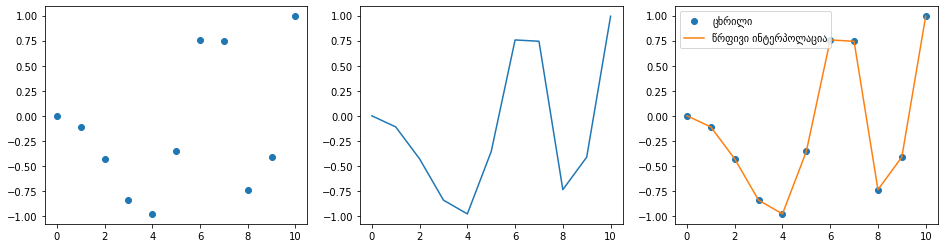

In [15]:
plt.figure(figsize=(16, 4))  # სურათის ზომის განსაზღვრა
plt.subplot(131)             # ნაკვეთის არჩევა 131 = 1 სვეტი + 3 სტრიქონი + 1-ი პოზიცია
plt.plot(x, y, "o")

plt.subplot(132)             # ნაკვეთის არჩევა 131 = 1 სვეტი + 3 სტრიქონი + 2-ი პოზიცია
plt.plot(x, y, "-")

plt.subplot(133)             # ნაკვეთის არჩევა 131 = 1 სვეტი + 3 სტრიქონი + 3-ი პოზიცია
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, "o", xnew, f1(xnew), '-')
plt.legend(["ცხრილი", "წრფივი ინტერპოლაცია"], loc='best')

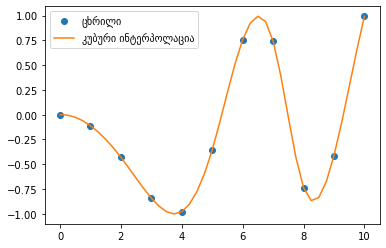

In [16]:
plt.clf()    # სურათის გაწმენდა

f3 = interp1d(x,y, kind = 'cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, "o", xnew, f3(xnew), '-')
plt.legend(["ცხრილი", "კუბური ინტერპოლაცია"], loc='best')

<h3 align="center">$\texttt{scipy.optimize}$ - ოპტიმიზაცია</h3>

- **ოპტიმიზაცია** არის საუკეთესო ელემენტის არჩევის პროცესი (გარკვეული კრიტერიუმის გათვალისწინებით) ხელმისაწვდომი ალტერნატივების გარკვეული სიმრავლიდან;

- ოპტიმიზაციის ამოცანებს მიეკუთვნება, მაგალითად, განტოლების ფესვების პოვნის ამოცანები.

<h3 align="center">$\texttt{scipy.optimize.minimize}$ - მინიმუმის პოვნა</h3>

- განვიხილოთ შუქის სხივის მოძრაობის ამოცანა:

  <img src="images/Optimization.png" width="300" alt="Example"  align="center"/>
  
  შუქის სხივის მოძრაობა წყალში არის უფრო ნაკლები ვიდრე ჰაერში:

  $$v_2 < v_1, \text{ } n = \frac{v_1}{v_2}$$
  
- საპოვნელია ოპტიმალური გზა $A$-წერტილიდან $B$-წერტილამდე:
  
  $$t_{AB} = \left | \frac{\overrightarrow{AO}}{v_1} \right | + \left | \frac{\overrightarrow{OB}}{v_2} \right | \rightarrow \min$$
  
- მოძრაობის საერთო დრო ტოლია:

  $$t_{AB} = \frac{\sqrt{x^2 + a^2}}{v_1} + \frac{\sqrt{(h-x)^2 + b^2}}{v_2}$$
  
  <img src="images/Optimization2.png" width="300" alt="Example"  align="center"/>


In [47]:
from scipy.optimize import minimize

def t_AB(x, a, b, h, v1, v2):
    La = np.sqrt(x**2 + a**2)
    Lb = np.sqrt((h-x)**2 + b**2)
    result = La / v1 + Lb / v2 
    return result

x0 = 1 #მეთოდის საწყისი მნიშვნელობა
min_time = minimize(t_AB, x0, args = (10, 10, 10, 4, 2))

print(min_time.success, min_time.x, min_time.fun)

True [7.00534492] 8.271791334231404


<h3 align="center">$\texttt{scipy.optimize.root}$ - განტოლებების ფესვის პოვნა</h3>

- დავუშვათ მოცემული გვაქვს განტოლება:

  $$x + 5 \cos(x) = 0,$$
  
  ან ეკვივალენტური განტოლება:
  
  $$5 \cos(x) = -x.$$
  
  როგორ ვიპოვოთ ამ განტოლების ფესვები?  

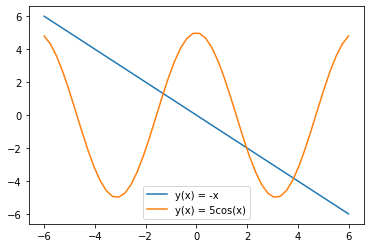

In [53]:
x = np.linspace(-6, 6)
y1 = -x
y2 = 5 * np.cos(x)
plt.plot(x, y1, "-", x, y2, "-")
plt.legend(["y(x) = -x", "y(x) = 5cos(x)"], loc='best')

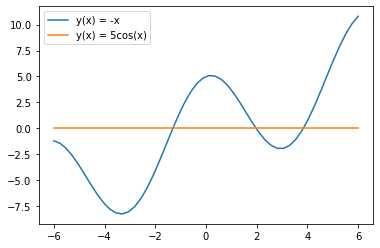

In [55]:
x = np.linspace(-6, 6)
y1 = 5 * np.cos(x) + x
y2 = 0 * x
plt.plot(x, y1, "-", x, y2, "-")
plt.legend(["y(x) = -x", "y(x) = 5cos(x)"], loc='best')

In [56]:
from scipy.optimize import root

def f(x):
    return x + 5 * np.cos(x)

x0 = -2 #მეთოდის საწყისი მნიშვნელობა
solution = root(f, x0)

print(solution.success, solution.x)

True [-1.30644001]


In [57]:
x0 = 2 #მეთოდის საწყისი მნიშვნელობა
solution = root(f, x0)

print(solution.success, solution.x)

True [1.97738303]


In [58]:
x0 = 4 #მეთოდის საწყისი მნიშვნელობა
solution = root(f, x0)

print(solution.success, solution.x)

True [3.83746711]


In [59]:
x0 = -6 #მეთოდის საწყისი მნიშვნელობა
solution = root(f, x0)

print(solution.success, solution.x)

False [-6.08202762]


<h3 align="center">$\texttt{scipy.optimize.root}$ - განტოლებათა სისტემის ფესვის პოვნა</h3>

- დავუშვათ მოცემული გვაქვს განტოლებათა სისტემა:

  $$
\left\{\begin{matrix}
x_1 \cdot \cos(x_2) & = 4\\ 
x_1 \cdot x_2 - x_2 & = 5
\end{matrix}\right.
$$
  
  როგორ ვიპოვოთ ამ განტოლებათა სისტემის ფესვვები?  

In [23]:
def f2(x):
    f = [ x[0] * np.cos(x[1]) - 4, 
          x[0] * x[1] - x[1] - 5 ]
    return f

z0 = [1, 1]
solution = root(f2, z0)
print(solution.success, solution.x)

True [6.50409711 0.90841421]


<h3 align="center">$\texttt{scipy.integrate}$ - ინტეგრირება და დიფერენცირება</h3>

<h3 align="center">$\texttt{scipy.integrate.integrate}$ - განსაზღვრული ინტეგრალი</h3>

- დავუშვათ მოცემული გვაქვს განსაზღვრული ინტეგრალი:

  $$ J = \int_{x_0}^{x_1} f(x) dx = \int_{0}^{1} x + 5 \cos(x) dx.$$
  
  როგორ გამოვთვალოთ მისი მნიშვნელობა?

In [24]:
import scipy.integrate as integrate

def f(x):
    return x + 5 * np.cos(x)

x0 = 0.0
x1 = 1.0
result = integrate.quad(f, x0, x1)
print(result)

(4.707354924039483, 5.2262138217512387e-14)


- პირველი მნიშვნელობა არის ინტეგრალის მნიშვნელობა, ხოლო მეორე არის გამოთვლის სიზუსტე.

In [25]:
def f(x, n):
    return (x**n) * np.sin(x)

result = integrate.quad(f, 0.0, 1.0, args = (3,))
print(result)

(0.17709857491700906, 1.9661891550116667e-15)


- დავუშვათ მოცემული გვაქვს ორპარამეტრიანი განსაზღვრული ინტეგრალი:

  $$ J = \int_{y_0}^{y_1} \int_{x_0}^{x_1} f(x,y) dx dy = 
         \int_{y=0}^{y=1/2} \int_{x = 0}^{1-2y} f(x,y) dx dy$$
  
  როგორ გამოვთვალოთ მისი მნიშვნელობა?

In [26]:
import scipy.integrate as integrate

def f(x,y):
    return x*y

y0 = 0.0
y1 = 0.5
result = integrate.dblquad(f, y0, y1, lambda x: 0, lambda x: 1 - 2*x)
print(result)

(0.010416666666666668, 4.101620128472366e-16)


<h3 align="center">$\texttt{scipy.integrate.simps}$ - ინტეგრირება სიმპსონის წესით</h3>

- დავუშვათ მოცემული გვაქვს ფუნქცია ცხილის სახით:

  $$(x_1, y_1) = (1, log(1))$$
  $$(x_2, y_2) = (2, log(2))$$
  $$(x_3, y_3) = (3, log(3))$$
  $$(x_4, y_4) = (4, log(4))$$
  $$(x_5, y_5) = (5, log(5))$$
  $$(x_6, y_6) = (6, log(6))$$
  
  როგორ გამოვთვალოთ ამ ფუნქციის ინტეგრალი სიმპსონის წესით?

5.725940279376572


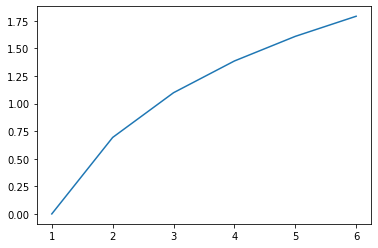

In [27]:
from scipy.integrate import simps

x = np.array([ 1., 2., 3., 4., 5., 6.])
y = np.array([ np.log(1), np.log(2), np.log(3), np.log(4), np.log(5), np.log(6)])
plt.plot(x, y, "-")

l1 = simps(y,x)
print(l1)

<h3 align="center">$\texttt{scipy.integrate.odient}$ - ჩვეულებრივი დიფერენციალური განტოლებების ამოხსნა</h3>

- ჩვეულებრივი დიფერენციალური განტოლებების ზოგადი სახეა:

  $$\frac{dy}{dx} = f(y, x) \text{,   } y(x_0) = y_0.$$

- დავუშვათ მოცემული გვაქვს ქანარის განტოლება:

  $$m\frac{d^2y}{dt^2} + k\frac{dy}{dt} + cy = 0,$$
  
  სადაც $k> 0$, $c>0$.

  <img src="images/L2_ODE.png" width="300" alt="Example"  align="center"/>

- ეს განტოლება წარმოადგენს მეორე რიგის წრფივ დიფერენციალურ განტოლებას. საწყისი პირობებია:

  $$y(0) = 1, \text{ } {y}'(0) = 0.$$
  
- მეორე რიგის დიფერენციალური განტოლება შეგვიძლია დავიყვანოთ პირველი რიგირს დიფერენციალურ განტოლებათა სისტემაზე:

  $$m\frac{d^2y}{dt^2} + k\frac{d^y}{dt} + cy = 0 \equiv
\left\{\begin{matrix}
\frac{dy}{dt} = &v \\ 
\frac{dy}{dt} = & -(kv +cy)/m \\ 
\end{matrix}\right.
$$

  

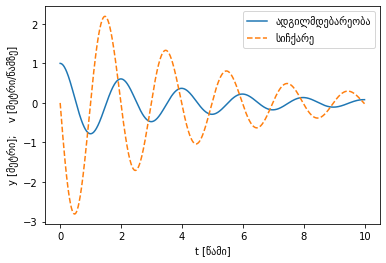

In [28]:
def right_side(z,t): # z[0] = y; z[1] = v
    m = 1.0
    c = 10.0
    k = 0.5
    
    dzdt = [ z[1], -(k*z[1] + c * z[0])/m]
    return dzdt

from scipy.integrate import odeint

t = np.arange(0, 10.0, 0.01)
y0 = [1.0, 0]
z = odeint(right_side, y0, t)

plt.plot(t, z[:,0], '-', t, z[:,1], '--')
plt.xlabel('t [წამი]')
plt.ylabel('y [მეტრი];    v [მეტრი/წამზე]')
plt.legend(['ადგილმდებარეობა', 'სიჩქარე'], loc='best')



<h3 align="center">$\texttt{scipy.stats}$ - ჩვეულებრივი დიფერენციალური განტოლებების ამოხსნა</h3>

- $\texttt{scipy.stats}$ მოდული შეიცავს მათემატიკური სტატისტიკის მრავალფეროვან ინსტრუმენტებს.


- განვიხილოთ ამოცანა რომელიც შედგება შემდეგი პუნქტებიდან:
  - განაწილების ფუნქციის განსაზღვრა (ჩვენს შემთხევაში გაუსის განაწილება);
  - განსაზღვირს არის არჩევა;
  - მონაცემების გენერაცია (ჩვენს შემთხვევაში 1000 მონაცემის);
  - გაუსის ხმაურის დამატება;
  - ბინის არჩევა და ჰისტოგრამის აგება (ჩვენს შემთხვევაში ბინის რაოდენობაა 20);
  - ჰისტოგრამის ნორმალიზაცია;
  - მიღებული ჰისტოგრამის ფიტირება;
  - საბოლოო გრაფიკის აგება, რომელიც აჩვენებს: 
    - თავდაპირველ განაწილებას;
    - დაკვირვების შედეგად მიღებულ ჰისტოგრამას
    - ფიტირებულ განაწილებას.


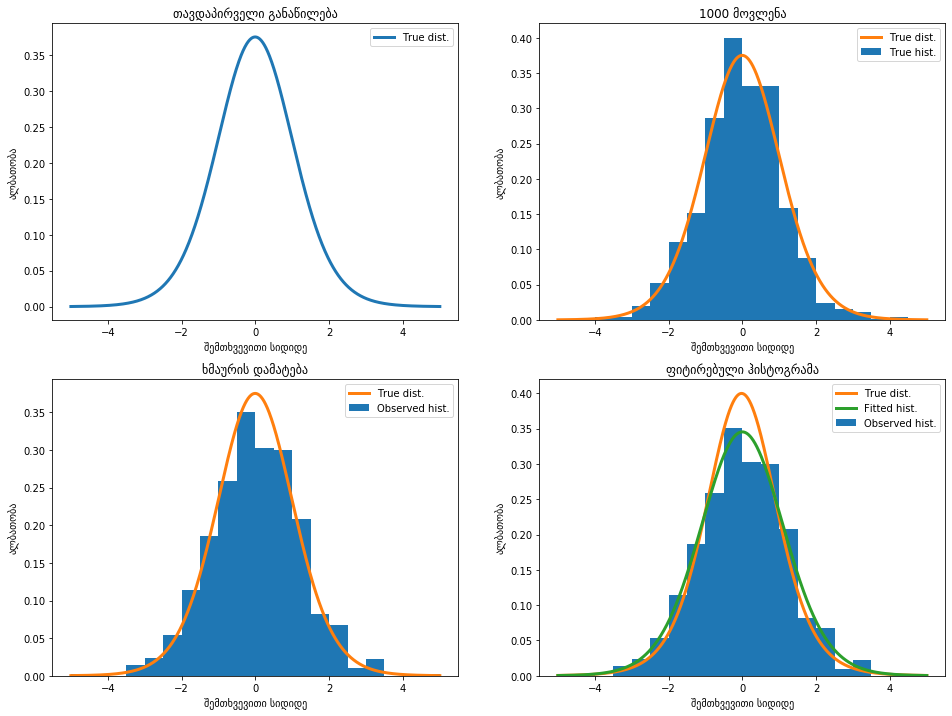

In [65]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


dof = 9
raw = np.random.standard_t(dof, [1000])
noise = np.random.normal(0, 0.5, size = [1000])
lnspc = np.linspace(-5, 5, 1000)

data = raw + noise

plt.figure(figsize=(16, 12)) 

plt.subplot(221)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 1-ი პოზიცია
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('თავდაპირველი განაწილება')
plt.legend()

plt.subplot(222)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 2-ი პოზიცია  
plt.hist(raw, bins = 20, range=[-5, 5], density = True, label='True hist.')
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('1000 მოვლენა')
plt.legend()

plt.subplot(223)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 3-ი პოზიცია  
hist = plt.hist(data, bins = 20, range=[-5, 5], density = True, label='Observed hist.')
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('ხმაურის დამატება')
plt.legend()

plt.subplot(224)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 4-ი პოზიცია  
hist = plt.hist(data, bins = 20, range=[-5, 5], density = True, label='Observed hist.')
p = stats.t.fit(raw, dof)
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
p_noised = stats.t.fit(data, dof)
pdf_g_noised = stats.t.pdf(lnspc, p_noised[0], p_noised[1], p_noised[2])
plt.plot(lnspc, pdf_g_noised, linewidth = 3, label='Fitted hist.')
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('ფიტირებული ჰისტოგრამა')
plt.legend()

<h1 align="center">ლექციის დასასრული</h1>